In [1]:
# 1. Clone the official implementation
!git clone https://github.com/buptLinfy/ZSE-SBIR.git
%cd ZSE-SBIR

Cloning into 'ZSE-SBIR'...
remote: Enumerating objects: 170, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 170 (delta 34), reused 20 (delta 20), pack-reused 123 (from 1)
Receiving objects: 100% (170/170), 9.51 MiB | 15.91 MiB/s, done.
Resolving deltas: 100% (63/63), done.
/content/ZSE-SBIR


In [2]:
pwd

'/content/ZSE-SBIR'

In [3]:
# Install gdown if not already present
!pip install gdown

# Create directories
!mkdir -p model checkpoint/sketchy_ext

# Download ViT backbone into model/
!gdown --id 1bznKsXDM5-xaUR9suCBBc7J33lIa70zJ \
       -O model/sam_ViT-B_16.pth

# Download best Sketchy‑Ext checkpoint into checkpoint/
!gdown --id 16HAlzuibGoQhhozcz4_vVO3rGZEyLqcw \
       -O checkpoint/sketchy_ext/best_checkpoint.pth

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1bznKsXDM5-xaUR9suCBBc7J33lIa70zJ
From (redirected): https://drive.google.com/uc?id=1bznKsXDM5-xaUR9suCBBc7J33lIa70zJ&confirm=t&uuid=a1a392d4-fdcb-447a-8dff-01af496b1dff
To: /content/ZSE-SBIR/model/sam_ViT-B_16.pth
100% 346M/346M [00:03<00:00, 92.0MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=16HAlzuibGoQhhozcz4_vVO3rGZEyLqcw
From (redirected): https://drive.google.com/uc?id=16HAlzuibGoQhhozcz4_vVO3rGZEyLqcw&confirm=t&uuid=0c397239-8791-4812-8267-330f5cac1c77
To: /con

In [4]:
# Create dataset folder
!mkdir -p datasets

# Sketchy (Sketchy_Extend split)
!gdown --id 11GAr0jrtowTnR3otyQbNMSLPeHyvecdP \
       -O datasets/sketchy_ext.tar.gz
!tar -zxvf datasets/sketchy_ext.tar.gz -C datasets



Streaming output truncated to the last 5000 lines.
Sketchy/EXTEND_image_sketchy_ready/castle/ext_163.jpg
Sketchy/EXTEND_image_sketchy_ready/castle/ext_383.jpg
Sketchy/EXTEND_image_sketchy_ready/castle/ext_384.jpg
Sketchy/EXTEND_image_sketchy_ready/castle/ext_251.jpg
Sketchy/EXTEND_image_sketchy_ready/castle/ext_234.jpg
Sketchy/EXTEND_image_sketchy_ready/castle/ext_440.jpg
Sketchy/EXTEND_image_sketchy_ready/castle/ext_126.jpg
Sketchy/EXTEND_image_sketchy_ready/castle/n02980441_6082.jpg
Sketchy/EXTEND_image_sketchy_ready/castle/ext_132.jpg
Sketchy/EXTEND_image_sketchy_ready/castle/ext_97.jpg
Sketchy/EXTEND_image_sketchy_ready/castle/ext_290.jpg
Sketchy/EXTEND_image_sketchy_ready/castle/ext_100.jpg
Sketchy/EXTEND_image_sketchy_ready/castle/ext_287.jpg
Sketchy/EXTEND_image_sketchy_ready/castle/ext_463.jpg
Sketchy/EXTEND_image_sketchy_ready/castle/ext_369.jpg
Sketchy/EXTEND_image_sketchy_ready/castle/ext_272.jpg
Sketchy/EXTEND_image_sketchy_ready/castle/ext_317.jpg
Sketchy/EXTEND_image_sket

In [5]:
!pip install tensorboardX

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 2.2 MB/s eta 0:00:00


In [6]:
# from inside /content/ZSE-SBIR
!cp /content/ZSE-SBIR/model/sam_ViT-B_16.pth ./sam_ViT-B_16.pth

In [7]:
# !python test.py \
#   --data_path ./datasets \
#   --dataset sketchy_extend \
#   --test_class test_class_sketchy25 \
#   --load /content/ZSE-SBIR/sam_ViT-B_16.pth \
#   --choose_cuda 0 \
#   --retrieval rn \
#   --testall

Traceback (most recent call last):
  File "/content/ZSE-SBIR/test.py", line 3, in <module>
    import torch
  File "/usr/local/lib/python3.11/dist-packages/torch/__init__.py", line 2108, in <module>
object address  : 0x7eef25201180
object refcount : 2
object type     : 0x9d5ea0
object type name: KeyboardInterrupt
object repr     : KeyboardInterrupt()
lost sys.stderr
^C


In [12]:
# In a separate code cell at the top of your notebook:
%cd /content/ZSE-SBIR


/content/ZSE-SBIR


In [1]:
from PIL import Image
import os, glob

sketch_root = "/content/ZSE-SBIR/datasets/Sketchy/256x256/sketch"

for class_tx in os.listdir(sketch_root):
    class_tx_dir = os.path.join(sketch_root, class_tx)
    if not os.path.isdir(class_tx_dir): continue
    for cls in os.listdir(class_tx_dir):
        cls_dir = os.path.join(class_tx_dir, cls)
        for png_path in glob.glob(os.path.join(cls_dir, "*.png")):
            img = Image.open(png_path).convert("RGB")
            jpg_path = png_path[:-4] + ".jpg"
            img.save(jpg_path, quality=95)
            os.remove(png_path)


In [2]:
from PIL import Image
from torchvision import transforms

preprocess = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    ),
])
img = Image.open("/content/ZSE-SBIR/datasets/Sketchy/256x256/sketch/tx_000000000000_ready/airplane/n02691156_10151-1.jpg").convert("RGB")
img_tensor = preprocess(img).unsqueeze(0)  # add batch dim


In [14]:
import torch
from model.sa import Self_Attention

# pick CUDA if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# this wraps the ViT patch‐embedder + positional‐embed + pretrained weights
model = Self_Attention(pretrained=True).to(device)
model.eval()


Self_Attention(
  (model): ViTPatch(
    (embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (scale): Scale_Embedding(
      (seq): Sequential(
        (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (1): ReLU(inplace=True)
        (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (3): ReLU(inplace=True)
        (4): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (5): ReLU(inplace=True)
        (6): Conv2d(256, 768, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      )
    )
    (dropout): Dropout(p=0.1, inplace=False)
    (transformer): Encoder(
      (encoder_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (layers): ModuleList(
        (0-11): 12 x ModuleList(
          (0): Encoder1DBlock(
            (layer_norm_input): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (layer_norm_out): La

In [18]:
with torch.no_grad():
    sa_feats, left_tokens, idxs = model(img_tensor)


In [21]:
# print(sa_feats.shape)       # → torch.Size([1,197,768])
# print(sa_feats[0,0].shape)  # → torch.Size([768])  (the “global” image vector)
# print(sa_feats[0,0])        # dumps the 768‐dimensional vector


In [22]:
sa_feats.shape        # → [1,197,768]


torch.Size([1, 197, 768])

In [23]:
img_vec = sa_feats[:,0]    # shape [1,768]


In [27]:
from glob import glob
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

# 1. point to your Sketch gallery root
gallery_root = "/content/ZSE-SBIR/datasets/Sketchy/256x256/sketch"

# 2. wrap in a torchvision dataset & loader
#    (this will apply the same `preprocess` transform you defined)
dataset = ImageFolder(gallery_root, transform=preprocess)
loader  = DataLoader(dataset, batch_size=64, shuffle=False, num_workers=4)

gallery_feats = []
gallery_paths = [p for p,_ in dataset.samples]  # paths in same order as loader

# 3. run the model in eval mode
model.eval()
with torch.no_grad():
    for imgs, _ in loader:
        imgs = imgs.to(device)
        sa,_,_ = model(imgs)
        # grab the CLS token embedding
        gallery_feats.append(sa[:,0].cpu())
gallery_feats = torch.cat(gallery_feats, dim=0).numpy()  # shape [N,768]


In [28]:
# 1. extract your query vector
query_vec = img_vec.cpu().numpy()                 # [1,768]

# 2. compute cosine similarities against the gallery
from sklearn.metrics.pairwise import cosine_similarity
sims = cosine_similarity(query_vec, gallery_feats)  # → [1, N]

# 3. pick the top-k most similar sketches
topk = 5
ids  = sims.argsort()[0][::-1][:topk]              # indices of best matches


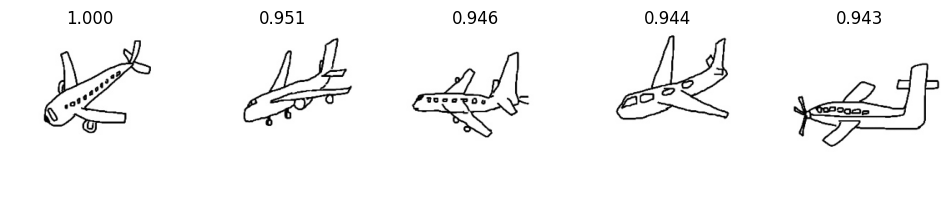

In [29]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(12,4))
for i, idx in enumerate(ids):
    path = gallery_paths[idx]
    img  = mpimg.imread(path)
    ax   = plt.subplot(1, topk, i+1)
    ax.imshow(img, cmap='gray' if path.endswith('.png') else None)
    ax.axis('off')
    ax.set_title(f"{sims[0,idx]:.3f}")
plt.show()


In [30]:
from glob import glob
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

# 1. point to your Sketch gallery root
gallery_root = "/content/ZSE-SBIR/datasets/Sketchy/256x256/photo"

# 2. wrap in a torchvision dataset & loader
#    (this will apply the same `preprocess` transform you defined)
dataset = ImageFolder(gallery_root, transform=preprocess)
loader  = DataLoader(dataset, batch_size=64, shuffle=False, num_workers=4)

gallery_feats = []
gallery_paths = [p for p,_ in dataset.samples]  # paths in same order as loader

# 3. run the model in eval mode
model.eval()
with torch.no_grad():
    for imgs, _ in loader:
        imgs = imgs.to(device)
        sa,_,_ = model(imgs)
        # grab the CLS token embedding
        gallery_feats.append(sa[:,0].cpu())
gallery_feats = torch.cat(gallery_feats, dim=0).numpy()  # shape [N,768]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [31]:
# 1. extract your query vector
query_vec = img_vec.cpu().numpy()                 # [1,768]

# 2. compute cosine similarities against the gallery
from sklearn.metrics.pairwise import cosine_similarity
sims = cosine_similarity(query_vec, gallery_feats)  # → [1, N]

# 3. pick the top-k most similar sketches
topk = 5
ids  = sims.argsort()[0][::-1][:topk]              # indices of best matches


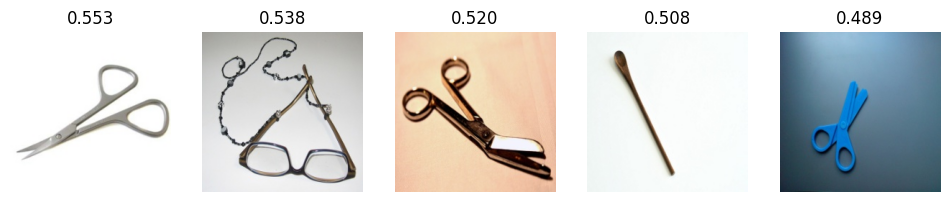

In [32]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(12,4))
for i, idx in enumerate(ids):
    path = gallery_paths[idx]
    img  = mpimg.imread(path)
    ax   = plt.subplot(1, topk, i+1)
    ax.imshow(img, cmap='gray' if path.endswith('.png') else None)
    ax.axis('off')
    ax.set_title(f"{sims[0,idx]:.3f}")
plt.show()
